In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

os.chdir('E:\Coding\Python\Earth Data Analytics')
# print(os.getcwd())

# Define path to file
plot_centroid_path = os.path.join("Data", "spatial-vector-lidar", 
                                  "california", "neon-sjer-site", 
                                  "vector_data", "SJER_plot_centroids.shp")
# print(plot_centroid_path)
# Import shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)

sjer_plot_locations.head(6)

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)


In [5]:
# View the geometry type of each row
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

In [6]:
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [7]:
sjer_plot_locations.crs

<Projected CRS: PROJCS["WGS_1984_UTM_Zone_11N",GEOGCS["WGS 84",DAT ...>
Name: WGS_1984_UTM_Zone_11N
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# View the spatial extent
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

In [9]:
sjer_plot_locations.shape

(18, 6)

<AxesSubplot:>

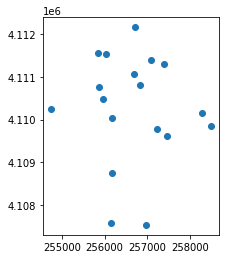

In [10]:
sjer_plot_locations.plot()

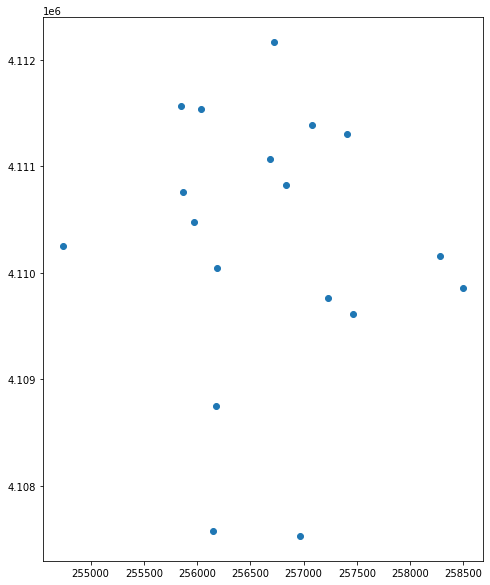

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
# Plot the data using geopandas .plot() method
sjer_plot_locations.plot(ax=ax)
plt.show()

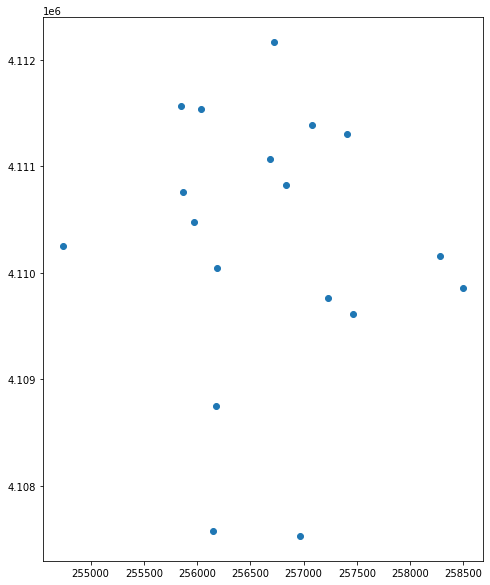

In [16]:
fig, ax1 = plt.subplots(figsize = (10,10))

# Plot the data using geopandas .plot() method
sjer_plot_locations.plot(ax=ax1)

plt.show()

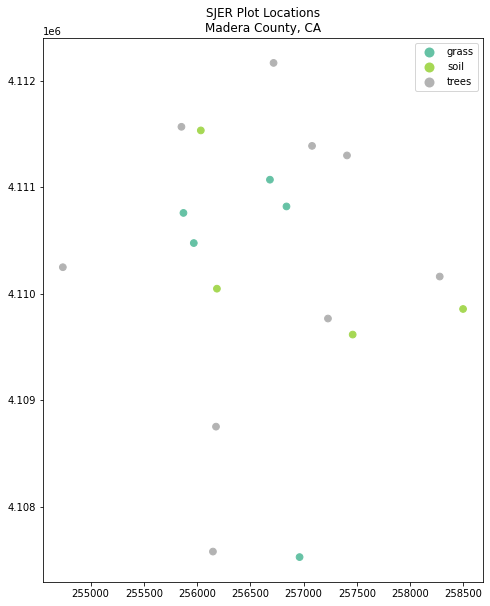

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data and add a legend
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         figsize=(10, 6),
                         markersize=45,
                         cmap="Set2",
                         ax=ax)
# Add a title
ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

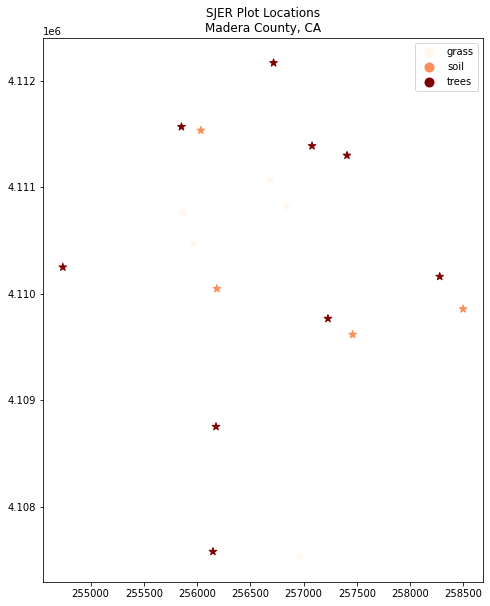

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         marker='*',
                         markersize=65,
                         cmap='OrRd', 
                         ax=ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

In [21]:
# Define path to crop boundary
sjer_crop_extent_path = os.path.join("data", "spatial-vector-lidar", 
                                     "california", "neon-sjer-site", 
                                     "vector_data", "SJER_crop.shp")

# Import crop boundary
sjer_crop_extent = gpd.read_file(sjer_crop_extent_path)

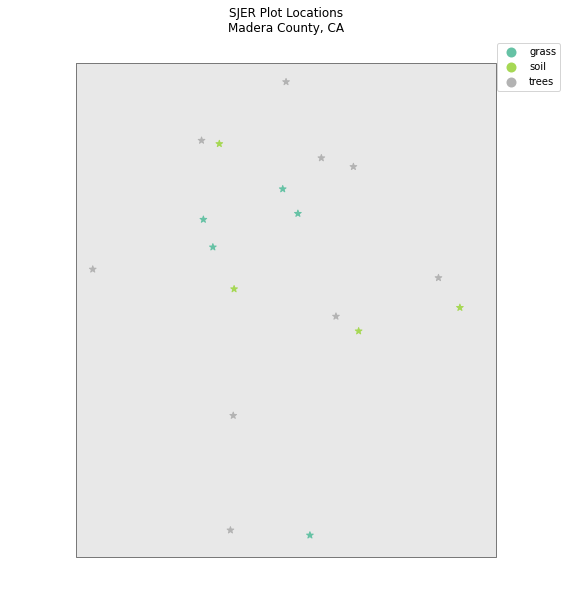

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

# First setup the plot using the crop_extent layer as the base layer
sjer_crop_extent.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=.5,
                      ax=ax)

# Add another layer using the same ax
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50,
                         cmap='Set2', ax=ax)
# Clean up axes
ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()